In [4]:
import pymssql

conn = pymssql.connect(server='longlan.database.windows.net',
                       user='longlan216',
                       password='Leonhardt216',
                       database='yz-sql-01')
cur = conn.cursor()

In [5]:
import openpyxl
import datetime
import pandas as pd

In [82]:
fname = "data.xlsx"

df = pd.read_excel('data.xlsx')


In [83]:
df

,Year,week number,Product,Price,On Flyer?,Discount,Units,Sales $,Gross Margin $,# Transactions that contained the product
0,2021,1,Pantene,7.99,No,0.00,8630,68953.70,33570.700000,8460
1,2021,2,Pantene,7.29,Yes,0.10,10183,74234.07,32483.770000,9983
2,2021,3,Pantene,5.49,Yes,0.30,21568,118408.32,29979.520000,17117
3,2021,4,Pantene,7.49,Yes,0.05,9309,69724.41,31557.510000,9038
4,2021,5,Pantene,7.99,No,0.00,8462,67611.38,32917.180000,8379
...,...,...,...,...,...,...,...,...,...,...
129,2022,11,Aussie,4.29,Yes,0.15,14757,63307.53,22239.353931,12315
130,2022,12,Aussie,4.99,No,0.00,10873,54256.27,23811.870000,10556
131,2022,13,Aussie,4.49,Yes,0.10,12630,56708.70,21339.947228,11254
132,2022,14,Aussie,4.99,No,0.00,10767,53727.33,23579.730000,10556


In [84]:
from sqlalchemy import create_engine
from sqlalchemy.engine import URL
connect_url = URL.create(
    'mssql+pymssql',
    username = 'longlan216',
    password = 'Leonhardt216',
    host = 'longlan.database.windows.net',
    database = 'yz-sql-01')
engine = create_engine(connect_url)

In [85]:
df.to_sql('shampoo_detail',con=engine,if_exists='append', chunksize = 1000)


134

In [86]:
cur.execute("Select * from [dbo].[shampoo_detail] where [Product] = 'Pantene' ")
pantene_result = cur.fetchall()

In [87]:
type(pantene_result)

list

In [88]:
test = pd.DataFrame(pantene_result)

In [89]:
test


,0,1,2,3,4,5,6,7,8,9,10
0,0,2021,1,Pantene,7.99,No,0.00,8630,68953.70,33570.70,8460
1,1,2021,2,Pantene,7.29,Yes,0.10,10183,74234.07,32483.77,9983
2,2,2021,3,Pantene,5.49,Yes,0.30,21568,118408.32,29979.52,17117
3,3,2021,4,Pantene,7.49,Yes,0.05,9309,69724.41,31557.51,9038
4,4,2021,5,Pantene,7.99,No,0.00,8462,67611.38,32917.18,8379
...,...,...,...,...,...,...,...,...,...,...,...
196,62,2022,11,Pantene,7.99,No,0.00,8883,70975.17,34554.87,8542
197,63,2022,12,Pantene,3.99,Yes,0.50,55008,219481.92,-6050.88,25935
198,64,2022,13,Pantene,7.99,No,0.00,8798,70296.02,34224.22,8542
199,65,2022,14,Pantene,6.79,Yes,0.15,13118,89071.22,35287.42,12247


Unable to load the data from the 

In [6]:
dv= pd.read_csv('sample.csv')

In [7]:
dv

,index,Year,week number,Product,Price,On Flyer?,Discount,Units,Sales $,Gross Margin $,# Transactions that contained the product
0,0,2021,1,Pantene,7.99,No,0.00,8630,68953.70,33570.70,8460
1,1,2021,2,Pantene,7.29,Yes,0.10,10183,74234.07,32483.77,9983
2,2,2021,3,Pantene,5.49,Yes,0.30,21568,118408.32,29979.52,17117
3,3,2021,4,Pantene,7.49,Yes,0.05,9309,69724.41,31557.51,9038
4,4,2021,5,Pantene,7.99,No,0.00,8462,67611.38,32917.18,8379
...,...,...,...,...,...,...,...,...,...,...,...
129,62,2022,11,Pantene,7.99,No,0.00,8883,70975.17,34554.87,8542
130,63,2022,12,Pantene,3.99,Yes,0.50,55008,219481.92,-6050.88,25935
131,64,2022,13,Pantene,7.99,No,0.00,8798,70296.02,34224.22,8542
132,65,2022,14,Pantene,6.79,Yes,0.15,13118,89071.22,35287.42,12247


In [8]:
dv.sample(20)

,index,Year,week number,Product,Price,On Flyer?,Discount,Units,Sales $,Gross Margin $,# Transactions that contained the product
105,38,2021,39,Pantene,7.99,No,0.00,8969,71662.31,34889.41,8542
132,65,2022,14,Pantene,6.79,Yes,0.15,13118,89071.22,35287.42,12247
107,40,2021,41,Pantene,7.99,No,0.00,8547,68290.53,33247.83,8379
126,59,2022,8,Pantene,7.99,No,0.00,8381,66964.19,32602.09,8216
45,45,2021,46,Pantene,4.49,No,0.45,37355,167723.95,14568.45,20927
128,61,2022,10,Pantene,7.99,No,0.00,8713,69616.87,33893.57,8542
10,10,2021,11,Pantene,7.99,No,0.00,8463,67619.37,32921.07,8216
15,15,2021,16,Pantene,7.99,No,0.00,8627,68929.73,33559.03,8542
22,22,2021,23,Pantene,7.99,No,0.00,8545,68274.55,33240.05,8216
3,3,2021,4,Pantene,7.49,Yes,0.05,9309,69724.41,31557.51,9038


In [9]:
dv= dv.replace('Yes',1)
dv= dv.replace('No', 0)

<AxesSubplot: xlabel='Discount', ylabel='Sales $'>

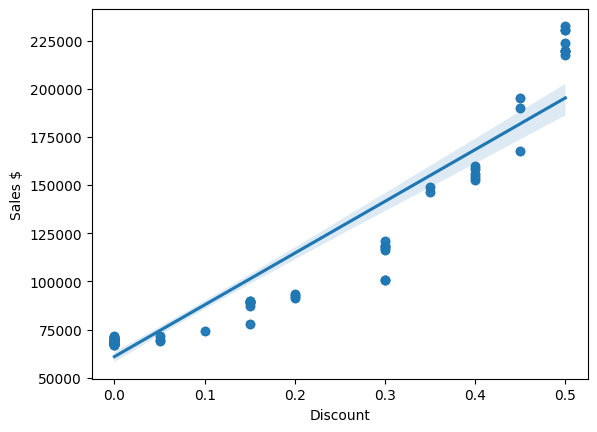

In [10]:
import seaborn as sns
%matplotlib inline
sns.regplot(x='Discount', y='Sales $',data=dv)

In [67]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np
lm = linear_model.LinearRegression()
features = ['Discount','Price','On Flyer?','week number']
X = dv[features]
Y = dv['Sales $']
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2, random_state = 100)
model = lm.fit(X_train, Y_train)
result = lm.predict(X_test)
result

array([195051.81810382, 106802.0859901 , 131950.90081505,  63869.44828129,
       143989.13535049,  94983.98132032, 194758.31161626,  63785.58928484,
       115089.36665294,  64152.47239429,  64100.06052151, 194821.2058636 ,
       186521.46846449,  63869.44828129, 131950.90081505,  95109.76981499,
        64267.7785144 ,  64215.36664162,  63869.44828129,  64131.50764517,
       115236.11989672, 158116.34573276,  63838.00115762,  60424.45763251,
        63827.51878306,  64100.06052151, 194926.02960915])

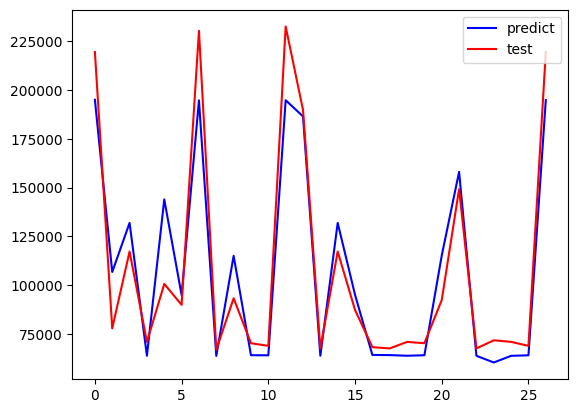

In [68]:
import matplotlib.pyplot as plt
sum_mean = 0
for i in range(len(result)):
    sum_mean +=(result[i] - Y_test.values[i])**2
sum_erro = np.sqrt(sum_mean/10)
sum_erro
plt.figure()
plt.plot(range(len(result)), result,'b', label = "predict")
plt.plot(range(len(Y_test)), Y_test,'r', label = "test")
plt.legend(loc = "upper right")
plt.show()

In [69]:
result01 = lm.predict([[0.6,3.19,1,6]])
result01

C:\Users\yzh19\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([223352.11708999])

In [70]:
dis = 0.3
discounts = [dis]
final_list = lm.predict([[dis,3.19,1,6]])
while dis <0.75:
    print(dis)
    
    dis = dis +0.05
    result = model.predict([[dis,3.19,1,6]])
    discounts = np.append(discounts,dis)
    final_list= np.append(final_list, result[0])
final_list



0.3
0.35
0.39999999999999997
0.44999999999999996
0.49999999999999994
0.5499999999999999
0.6
0.65
0.7000000000000001


C:\Users\yzh19\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\yzh19\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\yzh19\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\yzh19\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\yzh19\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([ -3342.34356528,  34440.06654393,  72222.47665314, 110004.88676235,
       147787.29687157, 185569.70698078, 223352.11708999, 261134.52719921,
       298916.93730842, 336699.34741763])

In [76]:
Y2 = dv['Gross Margin $']
X2 = dv[['Discount']]
X_train2,X_test2,Y_train2,Y_test2 = train_test_split(X2,Y2,test_size = 0.2, random_state = 100)
model2 = lm.fit(X_train2, Y_train2)
result2 = lm.predict(X_test2)
result2

array([ 9919.71259415, 28504.14345736, 20539.38737313, 36468.89954159,
       20539.38737313, 28504.14345736,  9919.71259415, 36468.89954159,
       25849.22476261, 36468.89954159, 36468.89954159,  9919.71259415,
       12574.6312889 , 36468.89954159, 20539.38737313, 28504.14345736,
       36468.89954159, 36468.89954159, 36468.89954159, 36468.89954159,
       25849.22476261, 17884.46867838, 36468.89954159, 33813.98084684,
       36468.89954159, 36468.89954159,  9919.71259415])

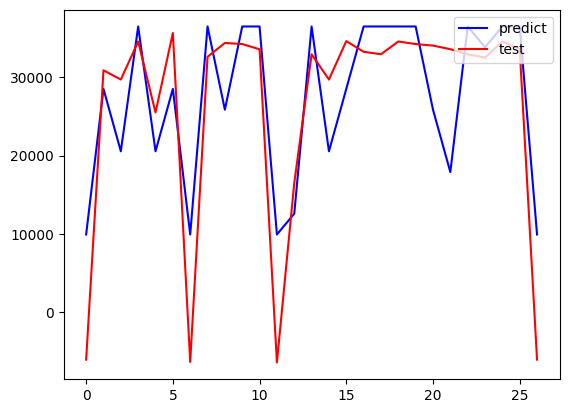

In [77]:
sum_mean = 0
for i in range(len(result2)):
    sum_mean +=(result2[i] - Y_test2.values[i])**2
sum_erro = np.sqrt(sum_mean/10)
sum_erro
plt.figure()
plt.plot(range(len(result2)), result2,'b', label = "predict")
plt.plot(range(len(Y_test2)), Y_test2,'r', label = "test")
plt.legend(loc = "upper right")
plt.show()

In [79]:
dis = 0.3
margin_list = model.predict([[dis]])
while dis <0.75:
    dis = dis +0.05
    result = model.predict([[dis]])
    margin_list= np.append(margin_list, result[0])
margin_list

C:\Users\yzh19\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\yzh19\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\yzh19\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\yzh19\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\yzh19\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([20539.38737313, 17884.46867838, 15229.54998364, 12574.6312889 ,
        9919.71259415,  7264.79389941,  4609.87520467,  1954.95650992,
        -699.96218482, -3354.88087956])

In [80]:
dict = {'discount':discounts,'predict_sale':final_list, 'predict_margin':margin_list}
df0 = pd.DataFrame(dict)
df0.to_csv("predict_sale.csv")